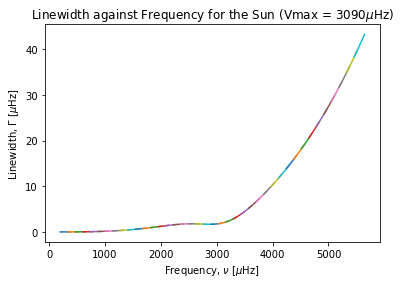

[1.00000000e+00 1.50895090e+00 2.01790179e+00 ... 5.08898210e+03
 5.08949105e+03 5.09000000e+03]
10000 10000


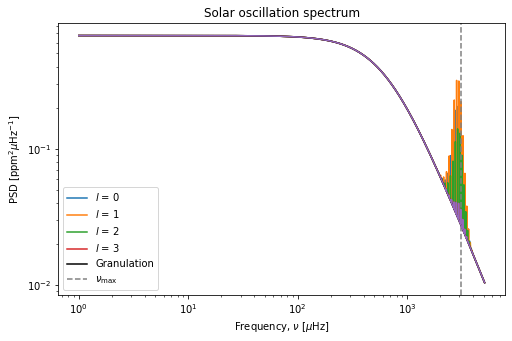

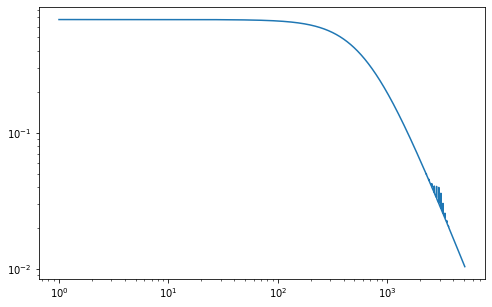

In [68]:
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib as mpl
#mpl.rcParams['text.usetex'] = True
#mpl.rcParams['font.family'] = 'serif'
#mpl.rcParams['font.size'] = 11

def nu(delta_nu, n, l):
    nu = []
    for i in l:
        nu.append(delta_nu * (n + i/2 + 1.45) - D * i * (i + 1))
    return nu

def lorentzian(x, x_0, width):
    return 1 / (np.pi * width * (1 + ((x - x_0) / width)**2))

def gaussian(x, sigma, mu):
    return np.exp(-(x - mu)**2 / (2 * sigma**2)) #/ (sigma * np.sqrt(2 * np.pi))

# Define solar parameters
L_sun = 3.846e26 # W
M_sun = 1.989e30 # kg
R_sun = 6.957e8 # m
T_eff_sun = 5777 # K

# Define stellar parameters
L = L_sun
M = M_sun
R = R_sun
T_eff = T_eff_sun

# Define temperatures
T_0 = 436 # K
T_red = 8907 * (L / L_sun)**(-0.093) # K
delta_T = 1250 # K

n = np.arange(40) # Array of n values to be plotted
l = np.arange(4) # Array of l values to be plotted
D = 1.5 # μHz

# old version of linewidth
# gamma_0 = 1.02 # μHz
# gamma = gamma_0 * np.exp((T_eff - 5777) / T_0) # μHz

delta_nu = M**(1/2) * R**(-3/2) * 135 / (M_sun**(1/2) * R_sun**(-3/2)) # μHz
nu = nu(delta_nu, n, l) # μHz
beta = (1 - np.exp((T_eff - T_red) / delta_T))
amplitude = 2.1 * beta * L * M_sun / L_sun / M * (T_eff_sun / T_eff)**2 # ppm
visibility = np.array([1, 1.5, 0.5, 0.04])

nu_max = 3090 # μHz
nu_range = 2000 # μHz
fwhm = 0.66 * nu_max**0.88 # μHz
sigma = fwhm / (2 * np.sqrt(2 * np.log(2)))
x = np.linspace(1, nu_max+nu_range, 10000) # μHz
sigma_c = 26 #gamma / (2 * np.sqrt(2 * np.log(2)))
tau_c = 250/1000000
P_granulation = 4 * sigma_c**2 * tau_c / (1 + (2 * np.pi * x * tau_c)**2)
# P_granulation = 2 / np.pi * 560**2 / 2.3 / (1 + (x/2.3)**2)

# #new method of linewidth
y = (nu_max/3090)

alpha = 2.95*y + 0.39 
gamma_alpha = 3.08*y + 3.32
Wdip = 4637*y - 141
nu_dip = 2984*y+ 60 
if nu_max < 4000:
    delta_gamma_dip = -0.47*y + 0.77
else:
    delta_gamma_dip = 0.001

linewidthlist = []
for i in range(len(nu)):
    linewidth = np.exp((alpha*np.log(nu[i]/nu_max) + np.log(gamma_alpha)) + ((np.log(delta_gamma_dip))/(1+(((2*np.log(nu[i]/nu_dip))/np.log(Wdip/nu_max))**2))))
    linewidthlist.append(linewidth)

    
plt.plot(nu, linewidthlist)
plt.title('Linewidth against Frequency for the Sun (Vmax = 3090$\mu$Hz)')
plt.xlabel(r'Frequency, $\nu$ [$\mu$Hz]')
plt.ylabel(r'Linewidth, $\Gamma$ [$\mu$Hz]')
# plt.savefig('linewidth_against_frequency.png')
plt.show()


plt.figure(figsize=(8, 5))


for i in l:
    y = np.zeros_like(x)
    index= 0
    for j in nu[i]:
        y += gaussian(x, sigma, nu_max) * amplitude**2 * 2 / np.pi / linewidth[index] * visibility[i] * lorentzian(x, j, linewidth[index])
        index+=1
    plt.plot(x, y+P_granulation, label=r'$l$ = {}'.format(i))
    
plt.plot(x, P_granulation, color='k', label='Granulation')
plt.axvline(x=nu_max, ls='--', color='gray', label=r'$\nu_{\rm max}$')
plt.title('Solar oscillation spectrum')
plt.xlabel(r'Frequency, $\nu$ [$\mu$Hz]')
plt.xscale("log")
plt.ylabel(r'PSD [ppm$^2 \mu$Hz$^{-1}$]')
plt.yscale("log")
# plt.xlim(np.min(x), np.max(x))
# plt.ylim(0)
plt.legend()
# plt.savefig('solar oscillation with granulation')

curve, = plt.plot(x, y + P_granulation)
xdata = curve.get_xdata()
ydata = curve.get_ydata()
print(xdata)
print(len(xdata), len(ydata))
plt.figure(figsize=(8, 5))
plt.plot(xdata, ydata)
plt.xscale("log")
plt.yscale("log")